# АНАЛИЗ ГИПОТЕЗ ДЛЯ УВЕЛИЧЕНИЯ ВЫРУЧКИ В ИНТЕРНЕТ-МАГАЗИНЕ

# Описание данных

#### Файл "hypothesis" (содержит выдвинутые гипотезы):
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
#### Файл "orders" (заказы покупатклей):
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
#### Файл "visitors" (сожержит данные, необходимые для проведения A/B теста)
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Цель исследования:

Проанализировать выдвинутые гипотезы, провести A/B тест, проанализировать результаты

# Ход исследования:

Проведение работы с предоставленнымифайлами в описании данными по следующему алгоритму:

#### Приоритизация гипотез:
 - Применим фреймворк ICE для приоритизации гипотез. 
 - Применим фреймворк RICE для приоритизации гипотез. 
 - Рассмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE.
 
#### Анализ A/B-теста:
 - Построение графика кумулятивной выручки по группам.
 - Построение графика кумулятивного среднего чека по группам.
 - Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. 
 - Построение графика кумулятивного среднего количества заказов на посетителя по группам.
 - Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
 - Построение точечный график количества заказов по пользователям. 
 - Рассчет 95-й и 99-й перцентили количества заказов на пользователя. 
 - Рассчет 95-й и 99-й перцентили стоимости заказов.
 - Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
 - Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
 - Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
 - Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.
 
#### Итог:
 Выводы и рекоммендации по результатам теста

In [71]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [72]:
try: 
    visitors = pd.read_csv('D:\\Практикум\\visitors.csv') # посещения
    orders = pd.read_csv('D:\\Практикум\\orders.csv')  # заказы
    hypothesis = pd.read_csv('D:\\Практикум\\hypothesis.csv')  # таблица с гипотезами
except:
    visitors = pd.read_csv('/datasets/visitors.csv') 
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

### Предобработка данных

In [73]:
# Изучим данные: 

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [74]:
#перепишем названия столбцов с нижним регистром и тобразим таблицу полностью:
hypothesis.columns = hypothesis.columns.str.lower()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проблем таблице не обнаружено

In [75]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [76]:
# Проверка на дубликаты:
visitors.duplicated().sum()

0

In [77]:
# Изменим тип данных в столбце с датой:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [78]:
print(visitors.info(), ' ', visitors, sep = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
 
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
..        ...   ...       ...
57 2019-08-27     B       720
58 2019-08-28     B       654
59 2019-08-29     B       531
60 2019-08-30     B       490
61 2019-08-31     B       718

[62 rows x 3 columns]


In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [80]:
# Проверка на дубликаты:
orders.duplicated().sum()

0

In [81]:
# Изменим тип данных в столбце с датой и приведем названия столбцов к единому стилю:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']      

In [82]:
print(orders.info(), ' ', orders, sep = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
 
      transaction_id  visitor_id       date  revenue group
0         3667963787  3312258926 2019-08-15     1650     B
1         2804400009  3642806036 2019-08-15      730     B
2         2961555356  4069496402 2019-08-15      400     A
3         3797467345  1196621759 2019-08-15     9759     B
4         2282983706  2322279887 2019-08-15     2308     B
...              ...         ...        ...      ...   ...
1192      2662137336  3733762160 2019-08

##### Данные готовы к работе: тип данных приведен к ожидаемому, дубликатов не обнаружено. 

### Приоритизация гипотез

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [83]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5).round({'ice': 2})

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00


#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [84]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


#### После применения разрых фреймворков топ 5 гипотех остались прежними, однако, более других выделяется гипотеза во фреймворке RICE "О добавлении формы подписки на все основные страницы", ее показатель вдвое превышает показатель второго места. Это связано с добавлением параметра "reach" в фомулу для расчета с показателем 10 и высокими показатетями других параметров в числителе и отномительно невысоким показателем трудозатрат в знаменателе. Остальные гипотезы тоже поменяли свой порядок из-за введения нового параметра.      

### Анализ A/B-теста

В первую очередь проанализируем кумулятивные метрики, для этого: 

In [85]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[
    np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group']
    )
].agg(
    {'date' : 'max', 
     'group' : 'max', 
     'transaction_id' : 'nunique', 
     'visitor_id' : 'nunique', 
     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [86]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [87]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 
                          'group', 
                          'orders', 
                          'buyers', 
                          'revenue', 
                          'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [88]:
# Проверим корректность созданного датафрейма по минимальный и максимальным датам:
print(cumulative_data.date.min(),' , ', cumulative_data.date.max())
print(visitors.date.min(),' , ', visitors.date.max())
print(orders.date.min(),' , ', orders.date.max())

2019-08-01 00:00:00  ,  2019-08-31 00:00:00
2019-08-01 00:00:00  ,  2019-08-31 00:00:00
2019-08-01 00:00:00  ,  2019-08-31 00:00:00


Даты совпадают

#### График кумулятивной выручки по группам

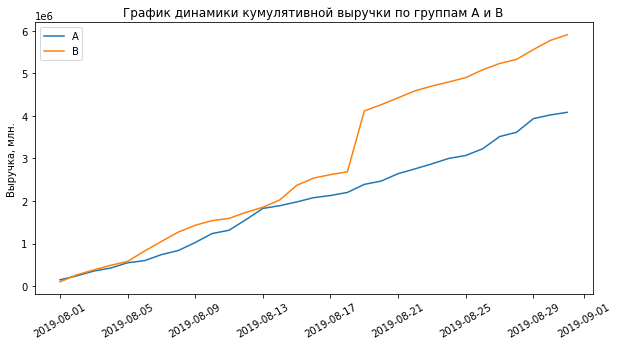

In [89]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

fig, ax = plt.subplots(figsize=(10, 5))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

Мы наблюдаем схожие темпы роста кумулятивной выручки, однако примерно 18го чмсла график В резко пошел вверх, это может свидетельствовать об аномально большом заказе в этот период в плане стоимости покупки, либо о резком всплеске количества заказов в указанный период. 

#### График кумулятивного среднего чека по группам

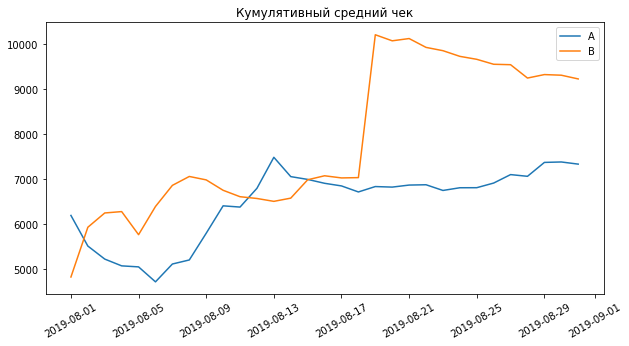

In [90]:
fig, ax = plt.subplots(figsize=(10, 5))
# Разделим кумулятивную выручку на кумулятивное число заказов для каждой группы:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xticks(rotation=30)
plt.legend()
plt.title('Кумулятивный средний чек')
plt.show()

Мы можем наблюдать выравнивание обоих графиков во второй половине наблюдаемого периода, однако в обозначенный ранее приод, 18го числа произощел аномальный рост графика В с последующим подением, что так же свидетельствует о наличии аномально дорогого заказа.  

#### Построим график относительного различия для среднего чека

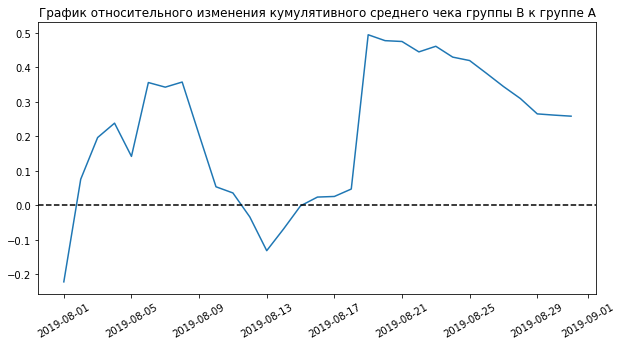

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))

# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (
   merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1
        )

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

Мы налюдаем скачкообразную картину, которая скорее всего свидетельствует об аномалиях

#### Построим график кумулятивной конверсии

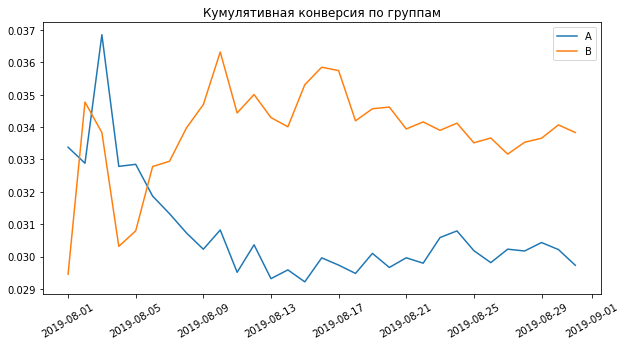

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))

# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a= cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=30)
plt.legend()

Мы налюдаем резкие скачки конверсии в начале наюлюдения для обоих групп, при этом после выравнивания график А слегка возрастает, а график В после аномального скачка идет вниз  

#### График относительного различия кумулятивных конверсий

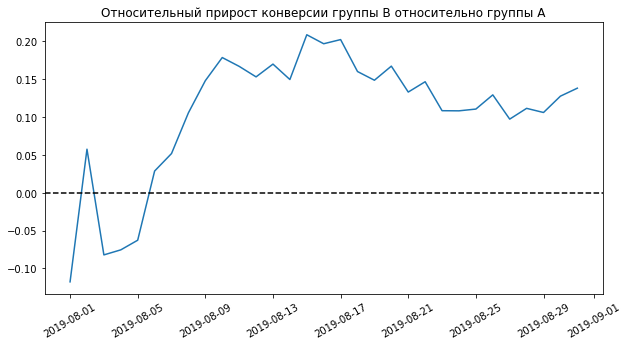

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))

merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)
plt.show()


Мы наблюдаем явный относительный прирост конверсии группы В относитенльно А 

##### Промедуточный вывод: во многих графиках мы наблюдаем превосходство группы В на группой А, при этим мноие графики видетельствуют о том, что группа В в большей степени оказалась под влиянием выбросов.  

### Анализ выбросов 



#### Построим точечную диаграмму числа заказов на одного пользователя

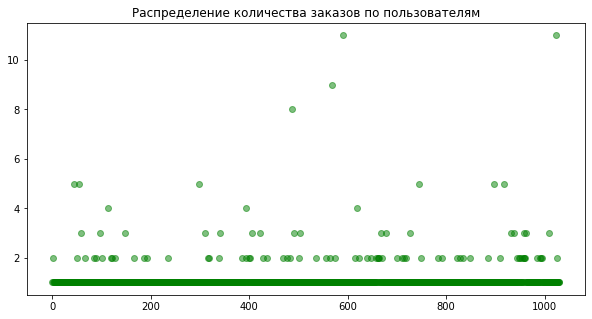

In [94]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

fig, ax = plt.subplots(figsize=(10, 5))

# строим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

Судя по графику, большинство пользователей делает 1-2 заказа, Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей:

In [95]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совержают более 2х покупок и не более 1% - более 4х покупок. Отметим в качестстве верхней границы для определения аномальных заказов 4 покупки. 

#### Построим точечный график стоимостей заказов

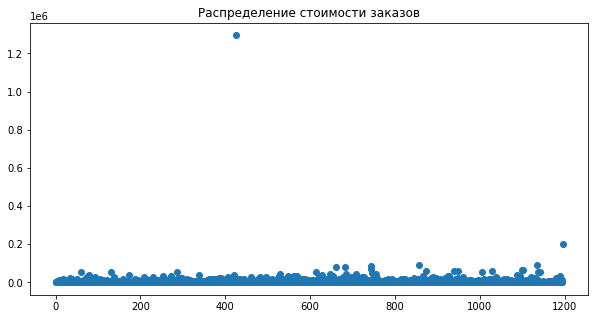

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(orders))), orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.show()

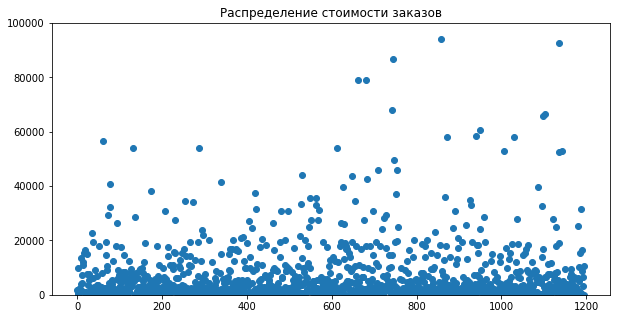

In [97]:

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(orders))), orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylim(0, 100000)
plt.show()

Мы наблюдаем явно выделяющийся по своей стоиомсти заказ. Возможно, это был тот самый заказ, который стал причиной аномальнго поведения графиков группы B. Изменив масштаб, мы видим, что основая масса покупок находится в пределах 40000р. Посчитаем 95-й и 99-й перцентили стоимости заказов: 

In [98]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Выберем в качатве границы аномальных заказов 99й перцентиль (заказы не дороже 58233,2р.)

## Статистистический анализ данных

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Т.к. мы наблюдали значительное кол-во выбросов в данных, воспользуемся критерием проверки Манна-Уитни и подготовим данные соотвутсвующим образом. 

In [99]:
#Подготовим данные для анализа:

visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
     axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


    date — дата;
    orders_daily_a — количество заказов в выбранную дату в группе A;
    revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
    orders_daily_a — количество заказов в выбранную дату в группе B;
    revenue_per_date_a — суммарная выручка в выбранную дату в группе B;
    orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
    revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
    orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
    revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
    visitors_per_date_a — количество пользователей в выбранную дату в группе A;
    visitors_per_date_b — количество пользователей в выбранную дату в группе B;
    visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
    visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами:

In [100]:

# Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders'].
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [101]:
#Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. 

sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

#### Сформулируем гипотеты и критерии для анализа: 
- Гипотеза Н0: различий в конверисии между группами нет
- Гипотеза Н1: различий в конверисии между группами есть

Уроровень статистической значимости примем равным 5% 

In [102]:
alpha = 0.05
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(sample_b.mean() / sample_a.mean()-1))

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


По сырым данным между исследуемыми группами получилась разница в кол-ве заказов. Относительный прирост оказался сущетсвенным в районе 14%. Связано ли это с аномалиями?   

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотеты и критерии для анализа:

 - Гипотеза Н0: различий в конверисии между группами нет

 - Гипотеза Н1: различий в конверисии между группами есть

Уроровень статистической значимости примемем равным 5%

In [103]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(orders[orders['group']=='B']['revenue'].mean()/
                                                    orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


В данном случае нулевую гипотезу отвергнуть не почилось, однако относительный прирост оказался существенным, возможно дело в аномалиях.

### Рассчет статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 58233 — users_with_expensive_orders. Объединим их в таблице abnormal_users.
Узнаем, сколько всего аномальных пользователей методом shape().

In [104]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей, рассмотрим поведение групп без них

In [105]:
#Подготовим выборки количества заказов по пользователям по группам теста:

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [106]:
alpha = 0.05
p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(sample_b_filtered.mean()/ sample_a_filtered.mean()-1))

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


Убрав аномалии разница между группами сохранилась, относительный прирост увелисился до 15% 

### Рассчет статистической значимости различий в среднем чеке стоимости заказов между группами по «очищенным» данным.

In [107]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[(orders['group']=='A') & 
np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
orders[(orders['group']=='B') & 
np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'])[1]
print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост В к А: {0:.3%}".format(orders[(orders['group']=='B') & 
np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() /
orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'].mean()-1))

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


### Выводы: 

##### Приоретизация гипотез. 

- Среди отсортированных методом ICE топ 3 гипотезами являются: 
    - Запустить акцию, дающую скидку на товар в день рождения.
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- В случае учета охвата пользователей при использовании метода RICE первенство занимают следующие гипотезы:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    
##### Анализ A/B-теста.
Проанализировав результаты A/B таста были выявлены следующие зависимости и особенности:

- кумулятивные метрики (с накоплением) группы B после выравнивания были стабильно выше группы А
- При рассчете статистической значимости в кол-ве заказв между группами по "сырым" данным выявилась разница в кол-ве заказов. Относительный прирост оказался сущетсвенным в районе 14%. После очистки данных от выбросов разница сохранилась, относительный прирост составил 15%
- При рассчете статистической значимости в среднем чеке заказа между группами по "сырым" данным разницы в кол-ве заказов не наблюдалось, несмотря на относительный прирост, что можно списать на выбросы. После очистки данных от выбросов разницы так же не выявилось, относительный прирост был близок к 0
- в процессе исследования были выявлены аномалии как по количству заказов, так и по стоимости заказа. После очистки сохранилось 99% данных.

Подводя итоги, можно сказать, что во второй половине теста результаты стабилизировались и не подвергались большим скачкам, поэтому продолжать тест нет смысла. Несмотря на то, что средний чек не изменился, мы могли наблюдать увеличение ко-ва заказов, что в свою очередь увеличит выручку компании. Предлагаю объявить победу группы "B" и закончить эксперимент.